In [2]:
import numpy as np
import matplotlib.pyplot as plt

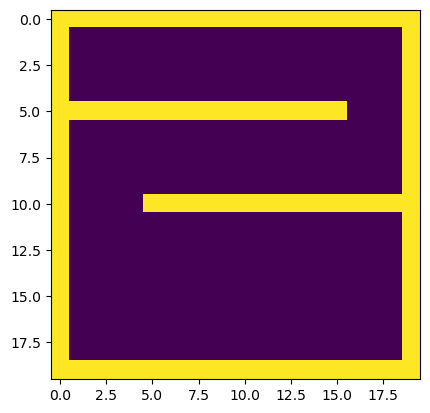

In [3]:
reality = -(np.pad(np.ones((18,18)),1)  - 1)
for ((wx1,wy1),(wx2,wy2)) in [((5,0),(5,15)),((10,5),(10,20))]:
    reality[wx1:wx2+1,wy1:wy2+1] = 1
    
plt.imshow(reality)
plt.show()

In [4]:
robot_real = {
    "position": (2,3),
    "rotation": 0, #degrees
    "sonar_p": (.97, .1),
    "pos_p": (.99, .2),
    "rot_p": (1.04, .2)
}

robot_belief = {
    "position": (2,3),
    "rotation": 0, #degrees
    "sonar_p": (.99, .09),
    "pos_p": (1.02, .22),
    "rot_p": (1.0, .21)
}

In [5]:
import math

def sonar(real, step=.3):
    position = real["position"]
    r = real["rotation"]
    orientation = np.array([math.cos(r), math.sin(r)])

    dist = 0
    while(reality[int(position[0]),int(position[1])] != 1):
        dist += step
        position += orientation * step     
    
    return int(np.random.normal(*real["sonar_p"]) * dist)

sonar(robot_real)

3

<function matplotlib.pyplot.show(close=None, block=None)>

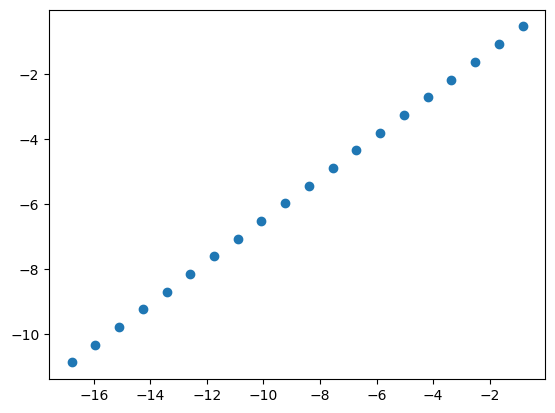

In [6]:
# IDEA
# draw curve
#

import math

robot = {
    "speed": 0,
    "position": np.array([0,0]),
    "angle": 10
}

def angle_to_vector(a):
    return np.array([math.cos(a),math.sin(a)])

def move(robot):
    return {
        "speed": robot["speed"],
        "position": robot["position"] + angle_to_vector(robot["angle"]),
        "angle": robot["angle"]
    }

def curve(robot, bezier, step=0):
    # the bezier curve is 2 x (+x,+y)
    start = np.array([0,0])

res = []
for i in range(20):
    robot = move(robot)
    res.append(robot["position"])

plt.scatter(*np.array(res).T)
plt.show

In [40]:
class FakeRobot():
    def __init__(self):
        self.speed = np.array([0.,0.])
        self.pos   = np.array([0.,0.])
        self.width = 0.5 # meters
        self.rotation = 0 # rads

        self.pos_history   = [np.array([0.,0.])]
        self.speed_history = [np.array([0.,0.])]

    def go_diff(self, l, r):
        self.speed = np.array([l,r])
        self.speed_history += self.speed

    def stop(self):
        self.speed = np.array([0.,0.])
        self.speed_history += self.speed

    def _step(self, step_size=.1):
        l, r  = self.speed
        L     = self.width
        theta = self.rotation

        # Turning radius in meters
        R = L * ((r+l)/(r-l))
        # Turning speed in radians
        w = (r-l) / L

        self.pos += np.array([R*math.sin(w*step_size+theta), R*math.cos(w*step_size+theta)])
        self.rotation += w*step_size
        self.pos_history.append(self.pos.copy())

[array([0., 0.]), array([0.09933467, 0.49003329]), array([0.29404384, 0.95056379]), array([0.57636507, 1.36323159]), array([0.93504312, 1.71158495]), array([1.35577861, 1.9817361 ]), array([1.82179815, 2.16291498]), array([2.31452302, 2.24789855]), array([2.81430982, 2.23329879]), array([3.30123364, 2.11969774]), array([3.75588235, 1.91162432]), array([4.16013055, 1.61737376]), array([4.49786214, 1.24867691]), array([4.75561283, 0.82023253]), array([4.9231069 , 0.34912136]), array([ 4.99366691, -0.14587489]), array([ 4.96447983, -0.64502228]), array([ 4.83670928, -1.12842137]), array([ 4.61544906, -1.57680058]), array([ 4.30952012, -1.97228444]), array([ 3.93111887, -2.29910625])]


(-3.0, 3.0)

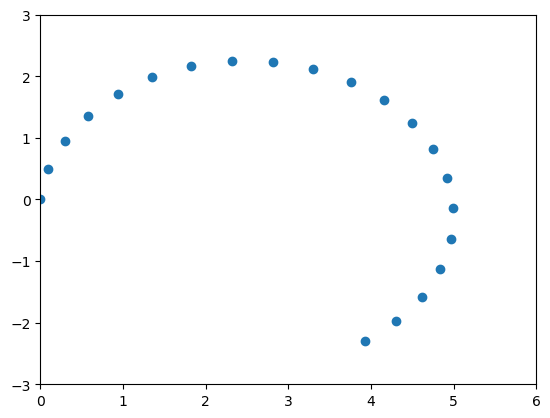

In [44]:
robot = FakeRobot()

robot.go_diff(0,1)
for _ in range(20):
    robot._step()
robot.stop()

print(robot.pos_history)
plt.scatter(*np.array(robot.pos_history).T)
plt.xlim(0,6)
plt.ylim(-3,3)

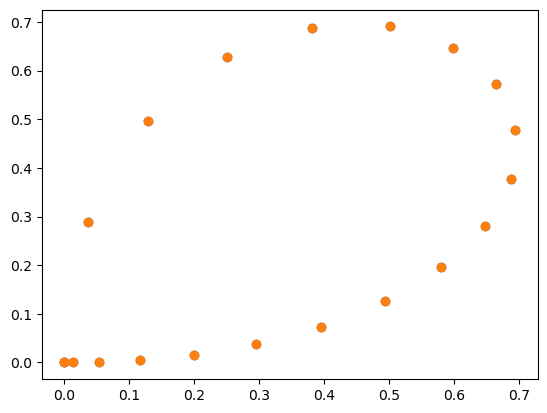

In [5]:
a = np.array([0,0])
b = np.array([1,0])
c = np.array([1,1])
d = np.array([0,1])

# Use a quarter sine for the ease-in

sine     = [math.sin(i) for i in np.linspace(0,math.pi/2,200)]
int_sine = [-math.cos(i)+1 for i in np.linspace(0,math.pi/2,20)]

#res = np.array([b + ((1-t)**2)*(a-b) + (t**2)*(c-b) for t in int_sine])
#plt.scatter(*res.T)

def lerp(t, a, b):
    # Interpolate line
    return (1-t)*a + t*b

def bezier_quad(t,a,b,c):
    # Calculate point
    p0 = lerp(t,a,b)
    p1 = lerp(t,b,c)
    p2 = lerp(t,p0,p1)
    
    return p2, d

def bezier(t, p):
    # de_casteljau
    res = p.copy()
    for a in range(len(res)):
        for i in reversed(range(a)):
            res[i] = lerp(t, res[i], res[i+1])
    
    return res[0]

def ease_in(t):
    # integral of sin
    return 1-math.cos(t*.5*math.pi)
    
accel = [ease_in(t) for t in np.linspace(0,1,20)]
curve = np.array([bezier(t,[a,b,c,d,a]) for t in accel])
plt.scatter(*curve.T)

res = [[0,0]]
pos, speed = np.array([0.,0.]), .3
for a,b in zip(curve[:-1], curve[1:]):
    # zip 2 bezier curves together, numeric differention 
    pos += (b-a) # use this to calculate angle + speed
    res.append(pos.copy())

plt.scatter(*np.array(res).T)
plt.show()